In [1091]:
import pandas as pd
import numpy as np
import sys
import seaborn as sn
from sklearn import preprocessing
import traceback
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [1092]:
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
aposentadoria_sum = 0

In [1093]:
def import_data():
    path = "datasets/"
    prefix = "APOSENTADOS_."
    months = ['01', '02', '03', '04', '05',
              '06', '07', '08', '09', '10', '11', '12']
    years = ["2017", "2018", "2019", "2020"]
    extension = ".csv"
    soma = 0

    columns = ["Nome", "CPF", "Matrícula do Servidor", "Nome do Órgão", "Sigla do Órgão", "Código do Órgão", "Cargo", "Classe", "Padrão", "Referência", "Nível", "Tipo de Aposentadoria", "Fundamentação da Inatividade",
               "Nome Diploma Legal", "Data de Publicação do Diploma Legal", "Ocorrência de Ingresso no Serviço Público", "Data de Ocorrência de Ingresso no Serviço Público", "Valor do Rendimento Líquido"]

    datasets = []
    sep = ";"
    for i in years:
        for j in months:
            soma = 0
            try:
                name = path + prefix + j + i + extension
                df = pd.read_csv(name, sep=sep, names=columns, header=0, encoding='cp850', index_col=False, decimal = ',', thousands='.')
                df['Data de Publicação do Diploma Legal']=df['Data de Publicação do Diploma Legal'].apply(lambda x: '{0:0>8}'.format(x))
                df['Data de Publicação do Diploma Legal'] = pd.to_datetime(df['Data de Publicação do Diploma Legal'].astype(str), format='%d%m%Y')
                df['Data de Ocorrência de Ingresso no Serviço Público']=df['Data de Ocorrência de Ingresso no Serviço Público'].apply(lambda x: '{0:0>8}'.format(x))
                df['Data de Ocorrência de Ingresso no Serviço Público'] = pd.to_datetime(df['Data de Ocorrência de Ingresso no Serviço Público'].astype(str), format='%d%m%Y')
                df['Valor do Rendimento Líquido'] = df['Valor do Rendimento Líquido'].astype(float)
                datasets.append(df)
            except Exception as e:
                traceback.print_exc()
                print("Erro na planilha: {}". format(name))
    if len(datasets) > 0:
        datasets = pd.concat(datasets)
    return datasets

In [1094]:
aposentadoria_dataset = import_data()

Traceback (most recent call last):
  File "/tmp/ipykernel_4075/1870665756.py", line 20, in import_data
    df = pd.read_csv(name, sep=sep, names=columns, header=0, encoding='cp850', index_col=False, decimal = ',', thousands='.')
  File "/home/mzv/.local/lib/python3.8/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/home/mzv/.local/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 586, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/home/mzv/.local/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 482, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/home/mzv/.local/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 811, in __init__
    self._engine = self._make_engine(self.engine)
  File "/home/mzv/.local/lib/python3.8/site-packages/pandas/io/parsers/readers.py", line 1040, in _make_engine
    return mapping[engine](self.f, **self.options)  # type: 

Erro na planilha: datasets/APOSENTADOS_.122017.csv
Erro na planilha: datasets/APOSENTADOS_.032018.csv
Erro na planilha: datasets/APOSENTADOS_.042018.csv
Erro na planilha: datasets/APOSENTADOS_.052018.csv


In [1095]:
def clean_spaces(df, text_columns):
    #retira os espaços em branco e coloca todos os caracteres em caixa baixa
    df = df.applymap(
        lambda x: " ".join( x.split() ).lower() if isinstance(x, str) else x, 
        na_action = 'ignore')    
    return df

In [1096]:
def clean_bar(df, column):
    df[column] = df[column].str.replace("║"," ")
    return df

In [1097]:
text_columns = ["Nome", "CPF", "Nome do Órgão", "Sigla do Órgão", "Cargo", "Classe", "Padrão", "Tipo de Aposentadoria", "Fundamentação da Inatividade",
               "Nome Diploma Legal", "Ocorrência de Ingresso no Serviço Público"]
aposentadoria_dataset = clean_spaces(aposentadoria_dataset, text_columns)
aposentadoria_dataset = clean_bar(aposentadoria_dataset, "Fundamentação da Inatividade")
aposentadoria_dataset.drop(columns=['Referência'],inplace=True)

In [1098]:
def sub_date(data_init = None, data_fim = None):
    meses = 0
    if (data_init != None) and (data_fim != None):
        anos = data_fim.year - data_init.year#diferença de anos
        meses = (data_fim.month - data_init.month + 1) + (anos*12)#quantos meses se passou da data final + quantidade de meses da passagem de anos
    return meses

In [1099]:
idx_init = 16
idx_date = 14
meses =[]
for row in aposentadoria_dataset.itertuples():
    meses.append(sub_date( data_init = row[idx_init], data_fim = row[idx_date]))
    
aposentadoria_dataset["Meses no Serviço Público"] = pd.Series(data = meses)

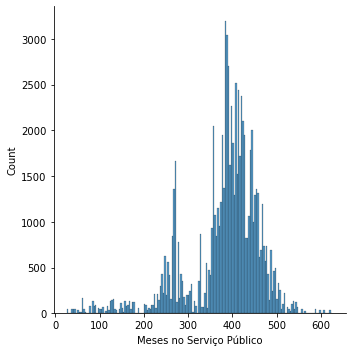

In [1100]:
sn.displot(aposentadoria_dataset['Meses no Serviço Público'])

In [1101]:
aposentadoria_dataset['month_year'] = aposentadoria_dataset['Data de Publicação do Diploma Legal'].dt.to_period('M')
aposentadoria_dataset

,Nome,CPF,Matrícula do Servidor,Nome do Órgão,Sigla do Órgão,Código do Órgão,Cargo,Classe,Padrão,Nível,Tipo de Aposentadoria,Fundamentação da Inatividade,Nome Diploma Legal,Data de Publicação do Diploma Legal,Ocorrência de Ingresso no Serviço Público,Data de Ocorrência de Ingresso no Serviço Público,Valor do Rendimento Líquido,Meses no Serviço Público,month_year
0,mafalda neta,***339751**,1.300000e+11,"minist.da agricultura,pecuaria e abast.",mapa,0,agente de portaria,s,iii,0,voluntaria,ec47 3,,2017-01-02,admissao sem concurso publico,1981-11-12,3666.71,423,2017-01
1,maria das gracas bernardino da silva,***677501**,1.300000e+11,"minist.da agricultura,pecuaria e abast.",mapa,0,aux operac de serv diversos,s,iii,0,voluntaria,ec47 3,,2017-01-02,admissao por concurso publico,1985-07-11,1073.29,379,2017-01
2,eduardo haroldo coelho,***897326**,1.300000e+11,"minist.da agricultura,pecuaria e abast.",mapa,0,agente de insp sanit ind prod origem ani,s,iv,0,voluntaria,ec47 3,,2017-01-02,decisao judicial,1977-12-01,5816.98,470,2017-01
3,cesar rodriguez de araujo,***512420**,1.300000e+11,"minist.da agricultura,pecuaria e abast.",mapa,0,auditor fiscal federal agropecuario,s,iv,0,voluntaria,ec47 3,,2017-01-31,admissao por concurso publico,1984-02-17,15892.66,396,2017-01
4,eloi madeira do amaral,***561278**,1.300000e+11,"minist.da agricultura,pecuaria e abast.",mapa,0,auditor fiscal federal agropecuario,s,iv,0,voluntaria,ec47 3,,2017-01-02,admissao sem concurso publico,1971-10-01,11032.63,544,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,vera regina de sousa dos reis,***170907**,7.000010e+11,comando da marinha,cm,40105,agente administrativo,s,iii,0,voluntaria,ec103 3 ec47 3,"port 001032/2020, dpc pub: do 08dez2020",2020-12-08,admissao sem concurso publico,1978-08-14,5634.68,271,2020-12
710,paulo jorge menezes de oliveira,***464247**,7.000010e+11,comando da marinha,cm,40105,artif de estrut de obras e metalurgia,s,iii,0,voluntaria,ec103 3 ec47 3,"port 001031/2020, amrj pub: do 08dez2020",2020-12-08,admissao sem concurso publico,1989-05-30,4769.30,271,2020-12
711,maria celia dos reis,***479252**,7.000010e+11,comando da marinha,cm,40105,datilografo,s,iii,0,voluntaria,ec103 3 ec47 3,"port 001033/2020, dpc pub: do 08dez2020",2020-12-08,admissao sem concurso publico,1986-08-01,3654.69,271,2020-12
712,everaldo domingos dos santos,***546244**,7.000010e+11,comando da marinha,cm,40105,artif de estrut de obras metalurgia,s,iii,0,voluntaria,ec103 3 aposentadoria especial,"port 001020/2020, eampe pub: do 01dez2020",2020-12-01,admissao por concurso publico,1994-03-02,1735.19,271,2020-12


In [1102]:
anomeses = []
aposentadoriasmes = []
soma = 0
#aposentadoria_dataset['month_year'] = aposentadoria_dataset['month_year'].to_timestamp()
for u in aposentadoria_dataset['month_year'].unique():
    anomeses.append(u)
    soma = 0
    for row in aposentadoria_dataset.itertuples():
        if row[19] == u:
            soma += row[17]
    aposentadoriasmes.append(soma)

In [1103]:
df = pd.DataFrame(columns = ['Meses','Custo ao Mês das Novas Aposentadorias'])
df['Custo ao Mês das Novas Aposentadorias'] = aposentadoriasmes
df['Meses'] = anomeses

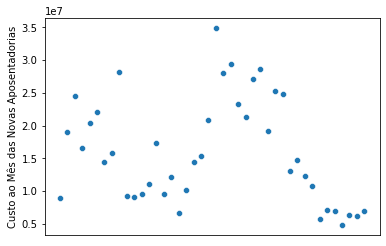

In [1105]:

df['Meses']= df['Meses'].dt.strftime('%Y-%m')
sn.scatterplot(data=df, x="Meses", y="Custo ao Mês das Novas Aposentadorias").axes.get_xaxis().set_visible(False)